In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
list_tickers = [
    'MERY.PA',
    'LI.PA',
    'NXI.PA',
    'CGR.PA',
    'CBSM.PA',
    'SPEL.PA',
    'ACAN.PA',
    'ALREA.PA',
    'CROS.PA'
]

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fundamental_analysis import *


In [5]:
sns.set_style("whitegrid")

In [6]:
def _ensure_continuous_array(ratios):
    ratio_array = list(ratios)
    outputs = list()
    for i, (_time, ratio) in enumerate(ratio_array):
        outputs.append(ratio)
        if i + 1 < len(ratio_array):
            next_time, _ = ratio_array[i + 1]
            if next_time > _time + 1:
                for extra_time in range(_time + 1, next_time):
                    outputs.append(np.nan)
                
    return outputs


def plot(tickers, financial_ratio_function):
    plot_data = dict()
    for ticker in list_tickers:
        plot_data[ticker] = _ensure_continuous_array(financial_ratio_function(ticker))
    number_of_years = max([len(ratios) for ratios in plot_data.values()])
    plot_data['Time'] = list(range(number_of_years))

    data_preproc = pd.DataFrame(plot_data)

    plt.figure(figsize=(6, 6))
    chart = sns.lineplot(x='Time', y=financial_ratio_function.__name__, hue='Companies', 
                 data=pd.melt(data_preproc, ['Time'], 
                              var_name='Companies', 
                              value_name=financial_ratio_function.__name__))
    chart.set_xticks(plot_data['Time'])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

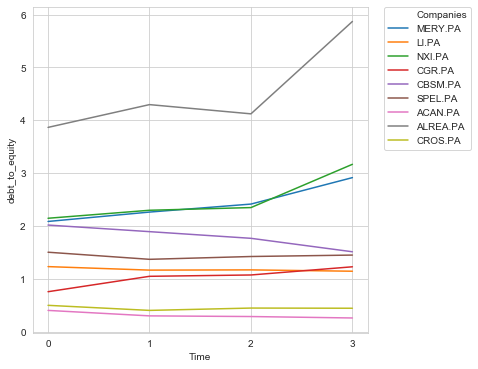

In [7]:
plot(list_tickers, debt_to_equity)

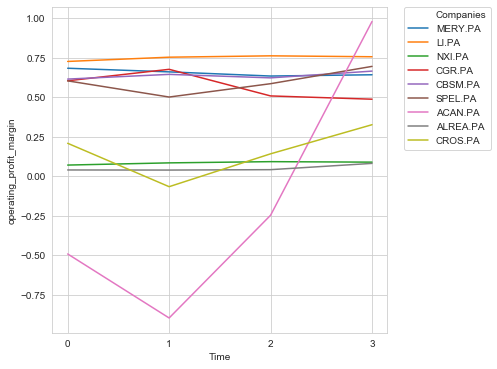

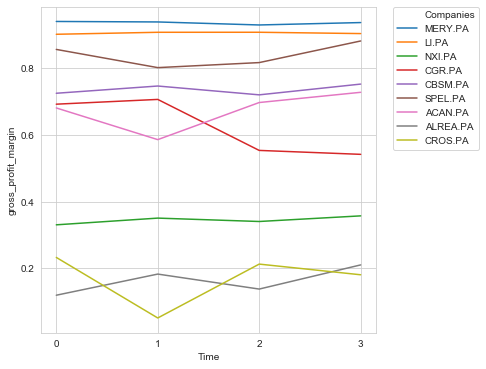

In [8]:
plot(list_tickers, operating_profit_margin)
plot(list_tickers, gross_profit_margin)

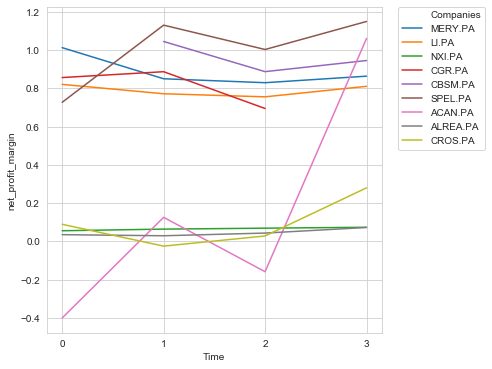

In [9]:
plot(list_tickers, net_profit_margin)

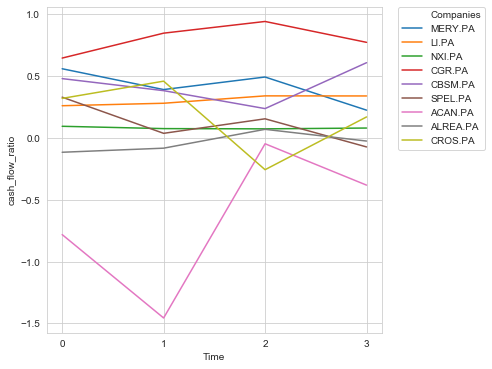

In [10]:
plot(list_tickers, cash_flow_ratio)

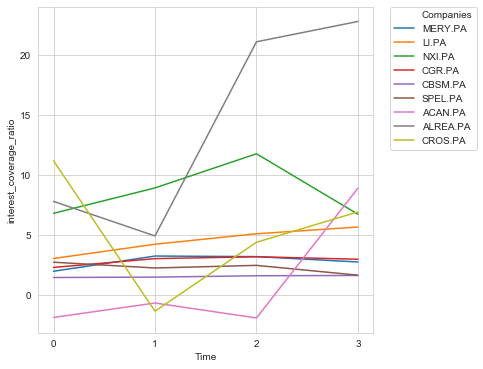

In [11]:
plot(list_tickers, interest_coverage_ratio)

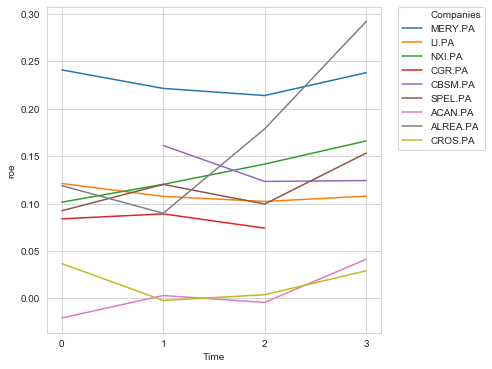

In [12]:
plot(list_tickers, roe)

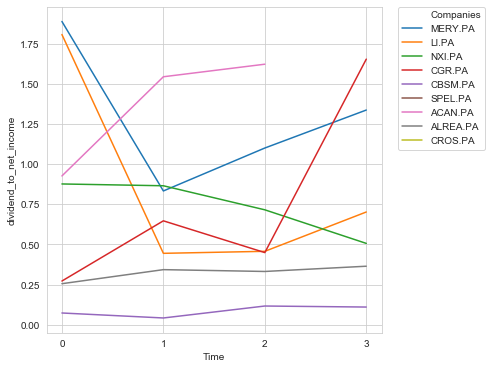

In [13]:
plot(list_tickers, dividend_to_net_income)